In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = "D:/에어비앤비/파리/listings.csv"
df = pd.read_csv(path)

In [6]:
print(df.shape)
df.head()

(84397, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
columns_to_keep = ['id', 'host_id','host_is_superhost','host_total_listings_count',
'neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','amenities',
'price','minimum_nights','maximum_nights','number_of_reviews_l30d',
'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_location','review_scores_value','reviews_per_month']

# 해당 컬럼만 선택
df = df[columns_to_keep]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           84397 non-null  int64  
 1   host_id                      84397 non-null  int64  
 2   host_is_superhost            84306 non-null  object 
 3   host_total_listings_count    84390 non-null  float64
 4   neighbourhood_cleansed       84397 non-null  object 
 5   room_type                    84397 non-null  object 
 6   accommodates                 84397 non-null  int64  
 7   bathrooms                    60959 non-null  float64
 8   bedrooms                     77480 non-null  float64
 9   beds                         60828 non-null  float64
 10  amenities                    84397 non-null  object 
 11  price                        60917 non-null  object 
 12  minimum_nights               84397 non-null  int64  
 13  maximum_nights  

In [10]:
df.columns = ['숙소_id', '호스트_id','슈퍼호스트','숙소_수','숙소_지역','숙소_유형','수용_인원수','욕실수','침실수','침대수','어메너티','숙소_가격','최소_숙박일','최대_숙박일','리뷰수','30일_리뷰수','리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수','평균_리뷰수']

c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


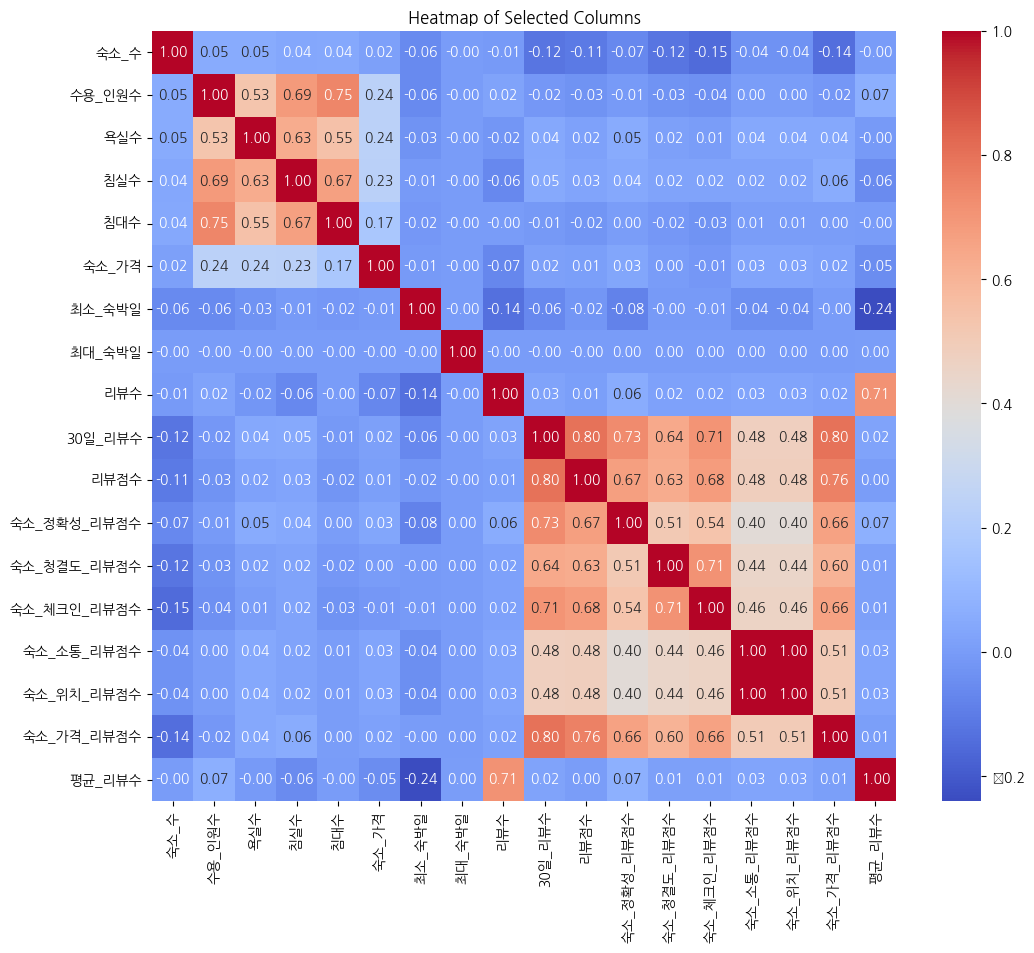

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 관심 있는 컬럼 선택
selected_columns = df[[ '숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']]

# 상관관계 매트릭스 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Selected Columns')
plt.show()


In [12]:
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\evol0\AppData\Local\Temp\ipykernel_21388\323963512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

다중회귀분석


In [2]:
pip install statsmodels


     ---------------------------------------- 9.8/9.8 MB 851.0 kB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# 결측치가 있는 행 전체 제거
df = df.dropna()


In [15]:
import statsmodels.api as sm

# 독립 변수 추가 (상수항)
X = sm.add_constant(df[['숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']])  # 예시
y = df['숙소_가격']

# 모델 핏팅
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        21:53:02   Log-Likelihood:            -3.1232e+05
No. Observations:               41586   AIC:                         6.247e+05
Df Residuals:                   41569   BIC:                         6.248e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -112.0225     40.365     -2.775      

const (상수항): -112.0225, 모든 설명 변수가 0일 때의 예상 숙소_가격. P-값은 0.006으로, 통계적으로 유의미합니다.
수용_인원수: 숙소 가격과 가장 강한 양의 관계를 보여줍니다(42.8012). 이는 수용 인원수가 많을수록 숙소 가격이 상승함을 의미하며, 통계적으로 유의미합니다(P < 0.001).
욕실수: 계수가 84.9890으로, 숙소 가격에 큰 영향을 미치며, 이 또한 통계적으로 유의합니다.
침실수: 양의 계수(20.3352)를 가지고 있으며, 숙소 가격에 유의한 영향을 미칩니다.
침대수: -13.1550의 계수로, 침대 수가 많을수록 숙소 가격이 낮아지는 경향을 보입니다. 이는 예외적인 상황일 수 있으며, 다른 변수와의 상호작용을 고려해볼 필요가 있습니다.
리뷰수: 계수가 -7.9141로, 리뷰 수가 많을수록 숙소 가격이 낮아짐을 나타냅니다. 이는 높은 리뷰 수가 가격 경쟁으로 이어질 수 있음을 의미할 수 있습니다.


그라디언 부스팅 회귀

In [17]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error



In [31]:
df2=sm.add_constant(df[['숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']])

In [33]:
X = df2  # '숙소_가격'을 제외한 모든 변수
y = df['숙소_가격']  # 타겟 변수

# 데이터를 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 모델 설정 및 학습
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# 예측
y_pred_gbr = gbr.predict(X_test)

# 성능 평가
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f'Mean Squared Error - Gradient Boosting: {mse_gbr}')


Mean Squared Error - Gradient Boosting: 475263.4853019712


### MSE 값 해석
- **475263.4853019712**의 MSE 값은, 예측 오류가 제곱되어 큰 값을 갖기 때문에 상대적으로 높게 나타날 수 있습니다. 숙소 가격의 단위가 큰 경우(예: 수백 또는 수천 단위) MSE 값도 상당히 클 수 있습니다.

In [35]:
# 특성 중요도 출력
feature_importance = gbr.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print(features.sort_values(by='Importance', ascending=False))



        Feature  Importance
1          숙소_수    0.276114
17       평균_리뷰수    0.181736
3           욕실수    0.150392
2        수용_인원수    0.081771
4           침실수    0.063036
12  숙소_청결도_리뷰점수    0.061127
6        최소_숙박일    0.046928
13  숙소_체크인_리뷰점수    0.034001
11  숙소_정확성_리뷰점수    0.023861
10         리뷰점수    0.023153
9       30일_리뷰수    0.014349
15   숙소_위치_리뷰점수    0.011791
14   숙소_소통_리뷰점수    0.008570
8           리뷰수    0.008164
16   숙소_가격_리뷰점수    0.006222
5           침대수    0.005123
7        최대_숙박일    0.003661
0         const    0.000000


특성 중요도 해석
숙소_수 (27.6%): 가장 높은 중요도를 지니며, 이는 숙소의 수가 많을수록 가격에 큰 영향을 미칠 수 있음을 나타냅니다. 숙소 수가 많은 지역이나 유형일수록 가격이 높을 가능성이 큽니다.
평균_리뷰수 (18.2%): 리뷰 수도 가격 결정에 중요한 역할을 하며, 고객의 만족도와 직접적인 연관이 있을 수 있습니다.
욕실수 (15.0%): 숙소의 편의 시설 중 하나로, 욕실의 수가 많을수록 높은 가격을 나타내는 데 기여합니다.
**수용_인원수 (8.2%)**와 침실수 (6.3%): 이 두 특성은 숙소의 크기와 직접적인 관련이 있으며, 큰 숙소일수록 높은 가격을 갖습니다.